In [1]:
import numpy as np
import pandas as pd
from pyscipopt import Model
from model import *
import random
import networkx as nx
import matplotlib.pyplot as plt

0.38.0


In [2]:
input_data = open("./data/tsp_51_1").read()
lines = input_data.split('\n')

nodeCount = int(lines[0])

points = []
for i in range(1, nodeCount+1):
    line = lines[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))


In [3]:
# nodeCount = 6
cost_matrix = np.zeros((nodeCount,nodeCount))
for i in range(nodeCount):
    for j in range(i,nodeCount):
        cost_matrix[i,j] = length(points[i],points[j])
#             cost_matrix[i,j] = random.random()
cost_matrix = pd.DataFrame(cost_matrix)
cost_matrix = cost_matrix + cost_matrix.transpose()
# cost_matrix

In [13]:
model = Model("tsp")
model.hideOutput()
xs = cost_matrix.applymap(lambda x: model.addVar(vtype="B"))
us = pd.Series(range(nodeCount)).map(lambda x: model.addVar(lb=0,ub=nodeCount,vtype="I") )

for index,row in  xs.iterrows():
    model.addCons(row.sum() == 1)
for index,col in  xs.iteritems():
    model.addCons(col.sum() ==1)
# for n in range(nodeCount):
#     model.addCons(xs[n][n] == 0)
    
# (xs + xs.transpose()).applymap(lambda const: model.addCons(const <=1))
for i in range(nodeCount):
    for j in range(nodeCount):
        if i > j:
            model.addCons(xs[j][i] + xs[i][j] <=1)
        if i == j:
            model.addCons(xs[i][j] == 0)
        if 0 < i and i != j :
            model.addCons(us[i] - us[j] + nodeCount * xs[i][j] <= nodeCount - 1)
            
objective = (xs * cost_matrix).sum().sum()
model.setObjective(objective)
model.setMinimize()



In [14]:
model.setRealParam("limits/time", 30)
model.optimize()
print({
    "status":model.getStatus(),
    "obj": model.getObjVal(),
    "time": model.getTotalTime()
})

{'status': 'timelimit', 'obj': 469.71680372474054, 'time': 32.0}


In [6]:
result = xs.applymap( model.getVal )
route = np.argmax(result.values,axis=1)
print(len((route)))

51


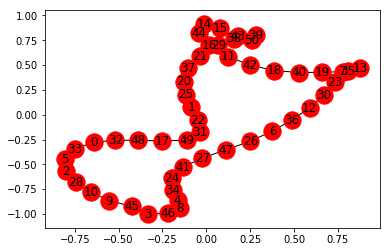

In [7]:
G = nx.empty_graph()
G.add_edges_from(list(zip(range(nodeCount),route)))
nx.draw_networkx(G)
plt.show()

In [8]:
start = 0
solution = []
for i in range(nodeCount):
    start = route[start]
    solution.append(start)
solution

[32,
 48,
 17,
 49,
 31,
 22,
 1,
 25,
 20,
 37,
 21,
 29,
 43,
 39,
 50,
 38,
 15,
 14,
 44,
 16,
 11,
 42,
 18,
 40,
 19,
 7,
 13,
 35,
 23,
 30,
 12,
 36,
 6,
 26,
 47,
 27,
 41,
 24,
 34,
 4,
 8,
 46,
 3,
 45,
 9,
 10,
 28,
 2,
 5,
 33,
 0]